<a href="https://colab.research.google.com/github/SAISUSHMAS-22/EverydayAI/blob/main/example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

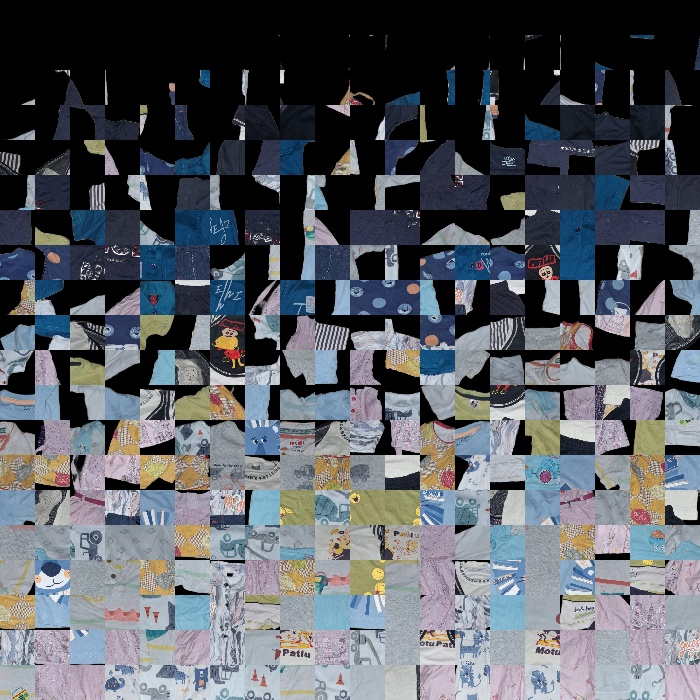

In [4]:
import cv2
import numpy as np
from IPython.display import Image
import random
def crop(image, n):
    height, width = image.shape[:2]
    square_size = min(height, width) // n
    squares = []
    for i in range(n):
        for j in range(n):
            y1, y2 = i * square_size, (i + 1) * square_size
            x1, x2 = j * square_size, (j + 1) * square_size
            square = image[y1:y2, x1:x2]
            squares.append(square)
    return squares
def join(squares, output_size):
    random.shuffle(squares)
    squares.sort(key=lambda square: np.mean(cv2.cvtColor(square, cv2.COLOR_BGR2GRAY)))
    rows = int(np.sqrt(len(squares)))
    cols = int(np.sqrt(len(squares)))
    bsquare = np.zeros((output_size, output_size, 3), dtype=np.uint8)
    for i in range(rows):
        for j in range(cols):
            square = cv2.resize(squares[i * cols + j], (output_size // cols, output_size // rows))
            bsquare[i * (output_size // rows):(i + 1) * (output_size // rows), j * (output_size // cols):(j + 1) * (output_size // cols)] = square
    return bsquare
image_paths = ["image1.jpg", "image2.jpg", "image3.jpg", "image4.jpg", "image5.jpg", "image6.jpg", "image7.jpg", "image8.jpg", "image9.jpg", "image10.jpg", "image11.jpg", "image12.jpg", "image13.jpg", "image14.jpg", "image15.jpg", "image16.jpg"]
images = []
for image_path in image_paths:
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error loading image: {image_path}")
    else:
        images.append(img)
n = 5
output_size = 700
squares = []
for image in images:
    cropped_squares = crop(image, n)
    squares.extend(cropped_squares)
result_image = join(squares, output_size)
cv2.imwrite('output_color.jpg', result_image)
Image(filename="output_color.jpg")
